In [ ]:
# Show intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/Titanic-Dataset.csv')  # Replace with your actual file


In [ ]:
df.info()      # Gives column names, data types, and missing values
df.head()      # Shows the first few rows
df.isnull().sum()  # Summarizes missing values column-wise


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.fillna({'Age': df['Age'].mean(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


<Axes: >

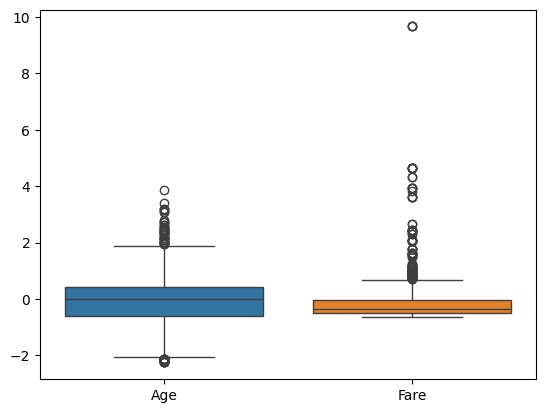

In [ ]:
sns.boxplot(data=df[['Age', 'Fare']])



In [ ]:
df.info()       # Recheck structure
df.describe()   # Recheck summary stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00


In [ ]:
import pandas as pd

df = pd.read_csv('/Titanic-Dataset.csv')  # Use Titanic dataset or another

# General overview
print(df.info())          # Columns, data types, missing values
print(df.describe())      # Summary stats for numeric columns
print(df.describe(include='object'))  # Summary for categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

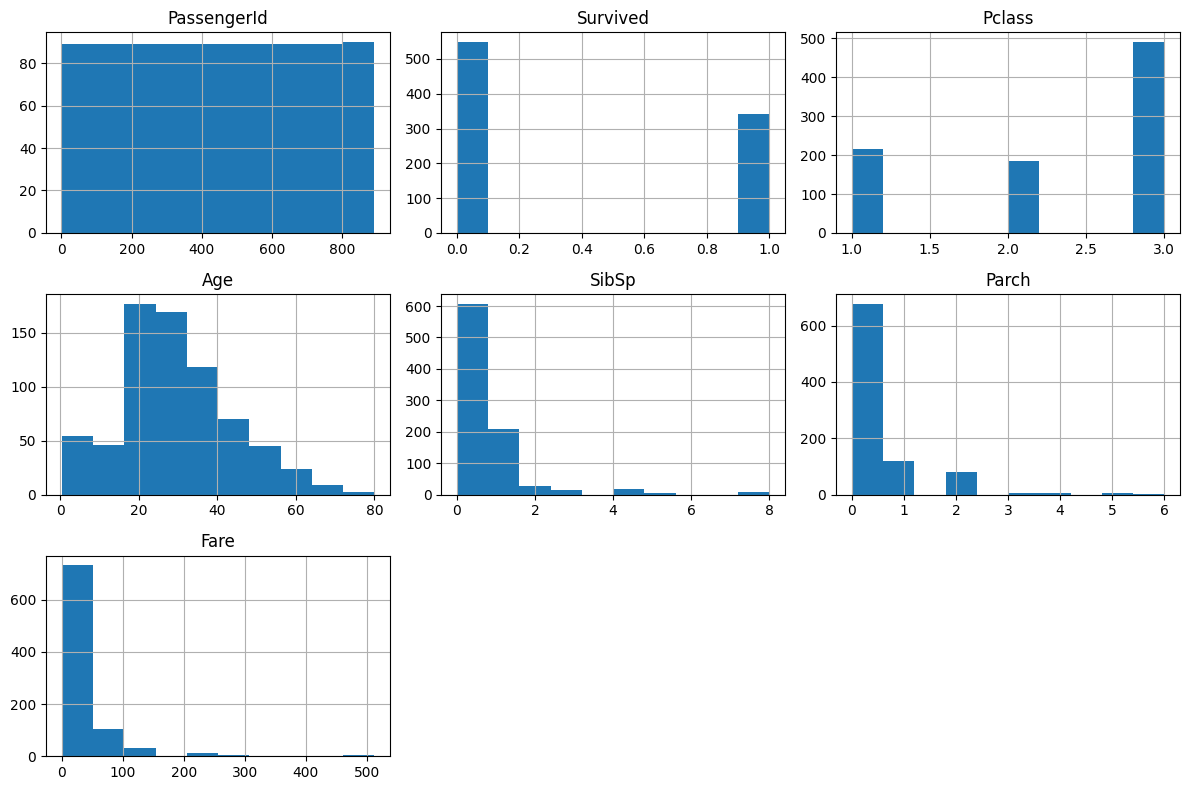

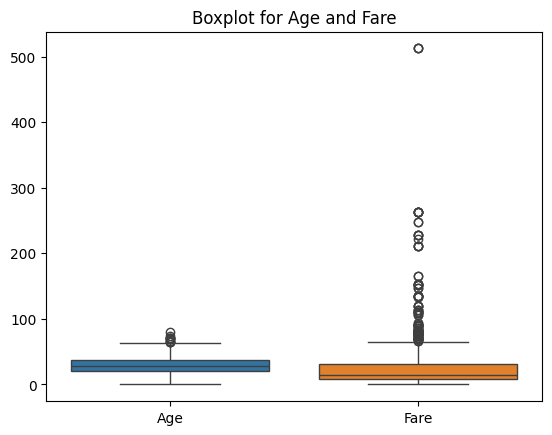

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplot to visualize outliers
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare")
plt.show()


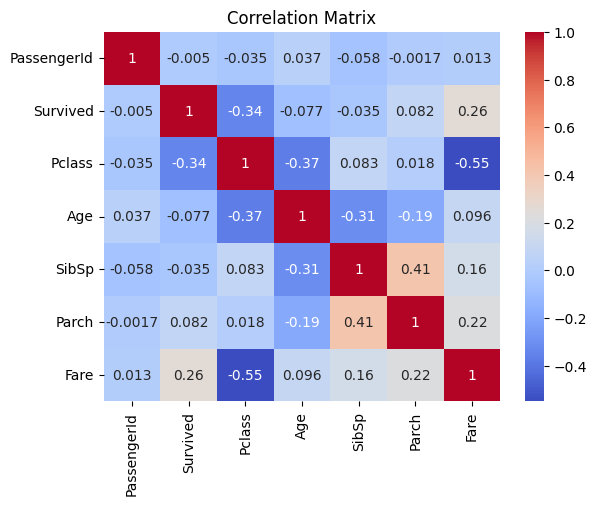

In [ ]:
# Correlation matrix with numeric columns only
numeric_df = df.select_dtypes(include='number')  # select only numeric columns
corr = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


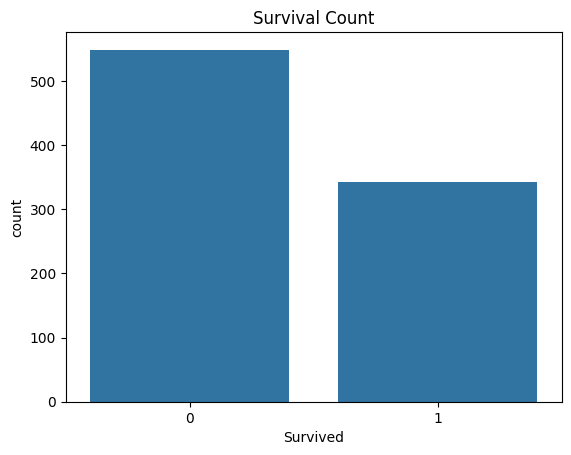

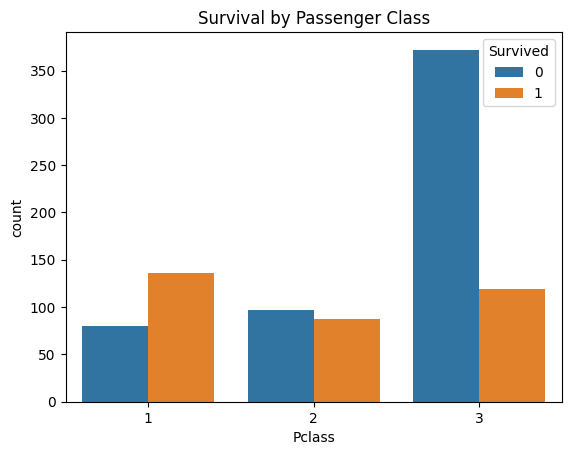

In [ ]:
# Countplot for survival
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [ ]:
import plotly.express as px

# Interactive histogram
fig = px.histogram(df, x="Age", color="Survived", marginal="box")
fig.show()

# Interactive scatter plot
fig = px.scatter(df, x='Age', y='Fare', color='Survived', size='Pclass')
fig.show()


In [ ]:
# Install libraries (if not already available)
!pip install scikit-learn pandas matplotlib



In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Load dataset (either from URL or upload)
from google.colab import files
uploaded = files.upload()

# Read CSV (replace 'your_file.csv' with the uploaded filename)
df = pd.read_csv('/content/Housing.csv')
df.head()


Saving Housing.csv to Housing (1).csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Basic preprocessing (handle missing values, encode if needed)
df = df.dropna()  # example


In [ ]:
print(df.columns)



Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
# Step 1: Separate target and features
y = df['price']
X = df.drop('price', axis=1)

# Step 2: Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


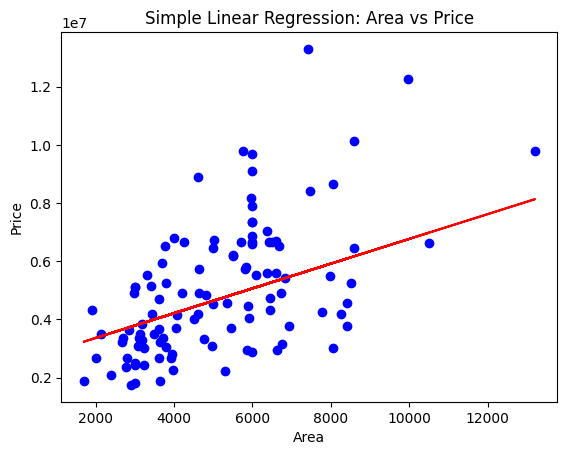

In [ ]:
# Use only one feature, e.g., 'area'
X = df[['area']]
y = df['price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# R-squared Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


In [ ]:
# Show intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 2512254.2639593435
Coefficients:
area: 425.72984193878284


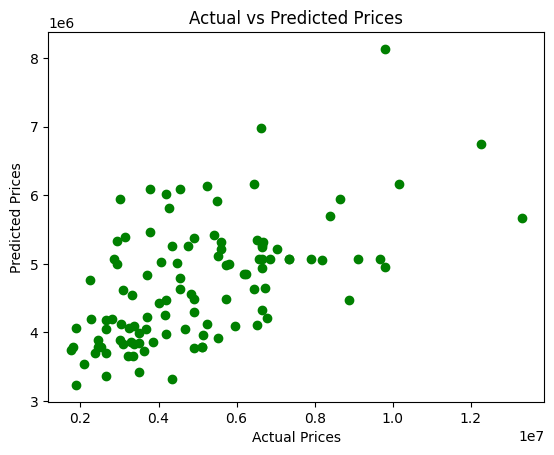

In [ ]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 2512254.2639593435
Coefficients: [425.72984194]


In [ ]:
print(X_train.shape)
print(X.columns)


(436, 1)
Index(['area'], dtype='object')


In [3]:
# Load dataset (either from URL or upload)
from google.colab import files
uploaded = files.upload()

# Read CSV (replace 'your_file.csv' with the uploaded filename)
df = pd.read_csv('/content/Housing.csv')
df.head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset (assuming you've already loaded df)
# Make sure 'price' is your target
X = df.drop('price', axis=1)

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

y = df['price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 260032.35760741215
Coefficients:
area: 235.9688045413957
bedrooms: 76778.7016343784
bathrooms: 1094444.7861005957
stories: 407476.59498491115
parking: 224841.91327662673
mainroad_yes: 367919.9476795722
guestroom_yes: 231610.0371756495
basement_yes: 390251.17618109327
hotwaterheating_yes: 684649.8853387912
airconditioning_yes: 791426.7358431868
prefarea_yes: 629890.5653133605
furnishingstatus_semi-furnished: -126881.81758510851
furnishingstatus_unfurnished: -413645.062228222


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
# Example if reading from CSV
# df = pd.read_csv('your_data.csv')

# Display the first few rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# Drop target variable 'price' to get features
X = df.drop('price', axis=1)

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['price']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 970043.4039201636
MSE: 1754318687330.6638
RMSE: 1324506.9600914386
R2 Score: 0.6529242642153184


In [13]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 260032.35760741215
Coefficients:
area: 235.9688045413957
bedrooms: 76778.7016343784
bathrooms: 1094444.7861005957
stories: 407476.59498491115
parking: 224841.91327662673
mainroad_yes: 367919.9476795722
guestroom_yes: 231610.0371756495
basement_yes: 390251.17618109327
hotwaterheating_yes: 684649.8853387912
airconditioning_yes: 791426.7358431868
prefarea_yes: 629890.5653133605
furnishingstatus_semi-furnished: -126881.81758510851
furnishingstatus_unfurnished: -413645.062228222


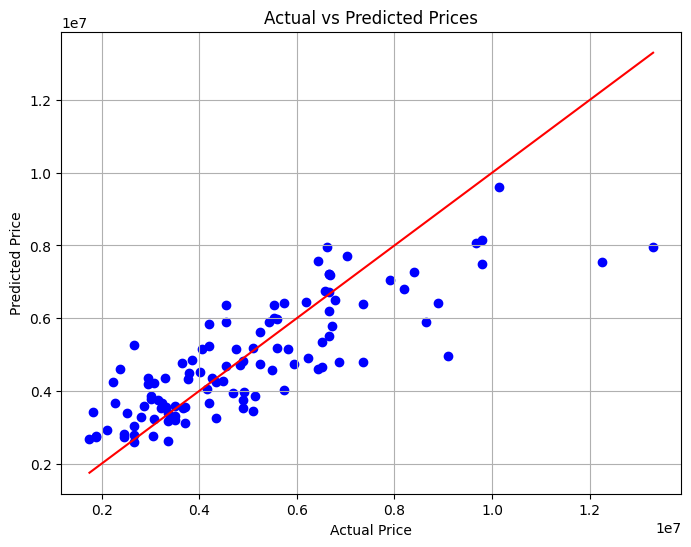

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # ideal fit line
plt.grid()
plt.show()
